### Single Label - Multiclass Classifications
Classify newswires into 46 mutually exclusive classes

In [2]:
from keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

print(len(test_data))
print(len(train_data))
print(train_data[10])

2246
8982
[1, 245, 273, 207, 156, 53, 74, 160, 26, 14, 46, 296, 26, 39, 74, 2979, 3554, 14, 46, 4689, 4329, 86, 61, 3499, 4795, 14, 61, 451, 4329, 17, 12]


In [3]:
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

In [5]:
import numpy as np
from keras.utils.np_utils import to_categorical


one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [17]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [10]:
history = model.fit(partial_x_train, partial_y_train, epochs=9, batch_size=512, validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/9
7982/7982 [==============================] - 1s 167us/step - loss: 0.1055 - acc: 0.9575 - val_loss: 1.1033 - val_acc: 0.7990
Epoch 2/9
7982/7982 [==============================] - 1s 161us/step - loss: 0.1019 - acc: 0.9579 - val_loss: 1.1133 - val_acc: 0.8020
Epoch 3/9
7982/7982 [==============================] - 1s 165us/step - loss: 0.1028 - acc: 0.9592 - val_loss: 1.0965 - val_acc: 0.7960
Epoch 4/9
7982/7982 [==============================] - 1s 164us/step - loss: 0.1030 - acc: 0.9575 - val_loss: 1.1221 - val_acc: 0.7970
Epoch 5/9
7982/7982 [==============================] - 1s 164us/step - loss: 0.0970 - acc: 0.9590 - val_loss: 1.1496 - val_acc: 0.8020
Epoch 6/9
7982/7982 [==============================] - 1s 161us/step - loss: 0.0988 - acc: 0.9565 - val_loss: 1.2267 - val_acc: 0.7870
Epoch 7/9
7982/7982 [==============================] - 1s 161us/step - loss: 0.0960 - acc: 0.9575 - val_loss: 1.1766 - val_acc: 0.7990
Epoch 8

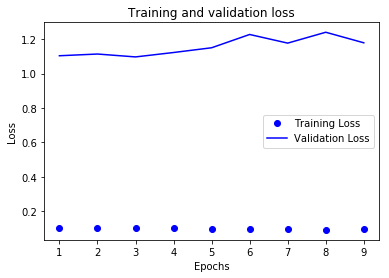

In [13]:
# Plotting Training and Validation Curves
# This time - Loss
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training Loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

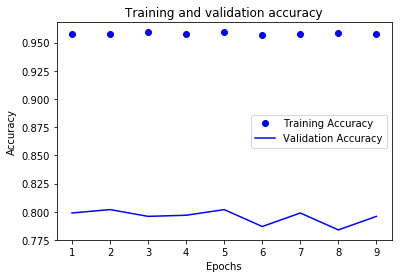

In [14]:
plt.clf()
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

plt.plot(epochs, acc_values, 'bo', label='Training Accuracy')
plt.plot(epochs, val_acc_values, 'b', label='Validation Accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [23]:
model.evaluate(x_test, one_hot_test_labels)

2246/2246 [==============================] - 0s 191us/step


[3.821615870468126, 0.008459483526268923]

In [24]:
predictions = model.predict(x_test)
print(predictions[0].shape)
print(np.sum(predictions[0]))
np.argmax(predictions[0])

(46,)
1.0


40

In [ ]:
# Instead of OHE - we can cast the labels as an integer tensor
x_train = np.array(train_labels)
y_train = np.array(test_labels)
#....
#....
#....
model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['acc'])
#....
#....
#model.fit as before but no need to OHE the labels

In [25]:
# Informational Compression
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(4, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [26]:
history = model.fit(partial_x_train, partial_y_train, epochs=9, batch_size=512, validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/9
7982/7982 [==============================] - 2s 198us/step - loss: 3.5344 - acc: 0.0604 - val_loss: 3.2401 - val_acc: 0.2500
Epoch 2/9
7982/7982 [==============================] - 1s 155us/step - loss: 2.9696 - acc: 0.3460 - val_loss: 2.7465 - val_acc: 0.3860
Epoch 3/9
7982/7982 [==============================] - 1s 155us/step - loss: 2.4381 - acc: 0.4074 - val_loss: 2.2766 - val_acc: 0.4120
Epoch 4/9
7982/7982 [==============================] - 1s 156us/step - loss: 1.9869 - acc: 0.5428 - val_loss: 1.9241 - val_acc: 0.6140
Epoch 5/9
7982/7982 [==============================] - 1s 156us/step - loss: 1.6776 - acc: 0.6521 - val_loss: 1.7219 - val_acc: 0.6220
Epoch 6/9
7982/7982 [==============================] - 1s 155us/step - loss: 1.4865 - acc: 0.6458 - val_loss: 1.6046 - val_acc: 0.6320
Epoch 7/9
7982/7982 [==============================] - 1s 156us/step - loss: 1.3615 - acc: 0.6681 - val_loss: 1.5398 - val_acc: 0.6360
Epoch 8